##**Лабораторная работа №2**

**Выполнил: Курьнояв А.И.**


**Группа: ИУ5-21М**

---

Задание:

1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализацию числовых признаков.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('football_players.csv')
data.head()

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992.0
1,2,France,Kylian Mbappé,France,Monaco,NaN,Paris Saint-Germain,Forward,180.0,£163,2018,NaN
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992.0
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999.0
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991.0


In [ ]:
data.dtypes

Rank              int64
Origin           object
Player           object
From_Country     object
From_Club        object
To_Country       object
To_Club          object
Position         object
Fee(€ mln)      float64
Fee(£ mln)       object
Year              int64
Born            float64
dtype: object

In [ ]:
data.isnull().sum()

Rank             0
Origin           0
Player           0
From_Country     6
From_Club        0
To_Country       1
To_Club          0
Position         0
Fee(€ mln)       0
Fee(£ mln)       0
Year             0
Born            10
dtype: int64

In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):

    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,))

From_Country_Data=data['From_Country']
To_Country_Data=data['To_Country']
Born_Data=data['Born']
From_Country_name=impute_column(data, 'From_Country', 'constant', fill_value_param='No_from_country')
To_Country_name=impute_column(data, 'To_Country', 'constant', fill_value_param='No_to_country')
Born_name=impute_column(data, 'Born', 'constant', fill_value_param=0)
data['From_Country']=From_Country_name
data['To_Country']=To_Country_name
data['Born']=Born_name
data.isnull().sum()

Rank            0
Origin          0
Player          0
From_Country    0
From_Club       0
To_Country      0
To_Club         0
Position        0
Fee(€ mln)      0
Fee(£ mln)      0
Year            0
Born            0
dtype: int64

In [ ]:
data[data.From_Country == 'No_from_country']

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee(€ mln),Fee(£ mln),Year,Born
13,14,England,Harry Maguire,No_from_country,Leicester City,England,Manchester United,Defender,87.0,£80,2019,1993.0
18,19,Spain,Kepa Arrizabalaga,No_from_country,Athletic Bilbao,England,Chelsea,Goalkeeper,80.0,£71.6,2018,1994.0
23,24,France,Zinedine Zidane,No_from_country,Juventus,Spain,Real Madrid,Midfielder,76.0,£46.6,2001,1972.0
24,25,Argentina,Ángel Di María,No_from_country,Real Madrid,England,Manchester United,Midfielder,75.6,£59.7,2014,1988.0
29,30,Brazil,Arthur,No_from_country,Barcelona,Italy,Juventus,Midfielder,72.0,£66,2020,1996.0
34,35,Portugal,Rúben Dias,No_from_country,Benfica,England,Manchester City,Defender,68.0,£61.64,2020,1997.0


In [ ]:
data[data.To_Country == 'No_to_country']

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee(€ mln),Fee(£ mln),Year,Born
1,2,France,Kylian Mbappé,France,Monaco,No_to_country,Paris Saint-Germain,Forward,180.0,£163,2018,0.0


In [ ]:
data[data.Born == 0]

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee(€ mln),Fee(£ mln),Year,Born
1,2,France,Kylian Mbappé,France,Monaco,No_to_country,Paris Saint-Germain,Forward,180.0,£163,2018,0.0
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,0.0
16,17,Netherlands,Virgil van Dijk,England,Southampton,England,Liverpool,Defender,84.5,£75,2018,0.0
19,20,Ivory Coast,Nicolas Pépé,France,Lille,England,Arsenal,Forward,80.0,£72,2019,0.0
32,33,France,Thomas Lemar,France,Monaco,Spain,Atlético Madrid,Midfielder,70.0,£63,2018,0.0
42,42,Argentina,Ángel Di María,England,Manchester United,France,Paris Saint-Germain,Midfielder,64.0,£44,2015,0.0
45,45,Brazil,Alisson,Italy,Roma,England,Liverpool,Goalkeeper,62.5,£56,2018,0.0
48,49,Serbia,Luka Jović,Germany,Eintracht Frankfurt,Spain,Real Madrid,Striker,60.0,£52.4,2019,0.0
51,52,France,Tanguy Ndombele,France,Lyon,England,Tottenham Hotspur,Midfielder,60.0,£53.8,2019,0.0
52,53,Colombia,Radamel Falcao,Spain,Atlético Madrid,France,Monaco,Striker,60.0,£51,2013,0.0


In [ ]:
data = pd.read_csv('football_players.csv')

Hotspots

In [ ]:
pd.get_dummies(data[['From_Country']]).head()

,From_Country_England,From_Country_France,From_Country_Germany,From_Country_Italy,From_Country_Netherlands,From_Country_Portugal,From_Country_Spain
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [ ]:
pd.get_dummies(data[['From_Country']], dummy_na=True).head()

,From_Country_England,From_Country_France,From_Country_Germany,From_Country_Italy,From_Country_Netherlands,From_Country_Portugal,From_Country_Spain,From_Country_nan
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0


In [ ]:
date = LabelEncoder()
date_transform = date.fit_transform(data['Born'])

In [ ]:
data['Born'].unique()

array([1992.,   nan, 1999., 1991., 1995., 1993., 1997., 1985., 1987.,
       2000., 1994., 1996., 1972., 1988., 1998., 1981., 1982., 1989.,
       1990.])

In [ ]:
np.unique(date_transform)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [ ]:
data = pd.read_csv('football_players.csv')
data.head()

,Rank,Origin,Player,From_Country,From_Club,To_Country,To_Club,Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992.0
1,2,France,Kylian Mbappé,France,Monaco,NaN,Paris Saint-Germain,Forward,180.0,£163,2018,NaN
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992.0
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999.0
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991.0


In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

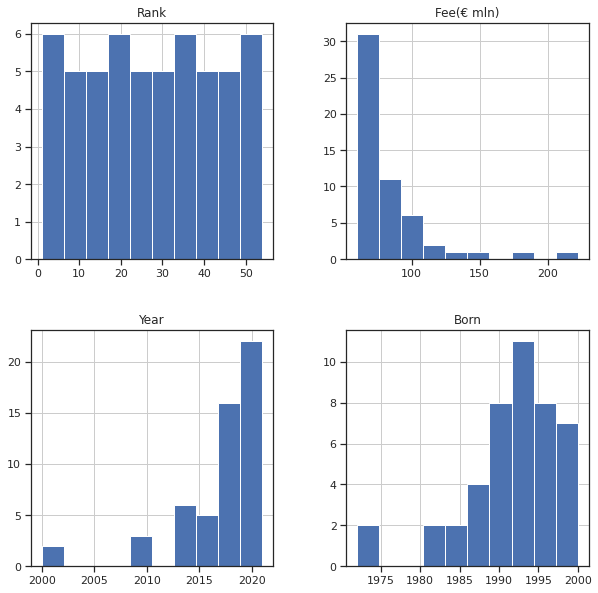

In [ ]:
data.hist(figsize=(10,10))
plt.show()

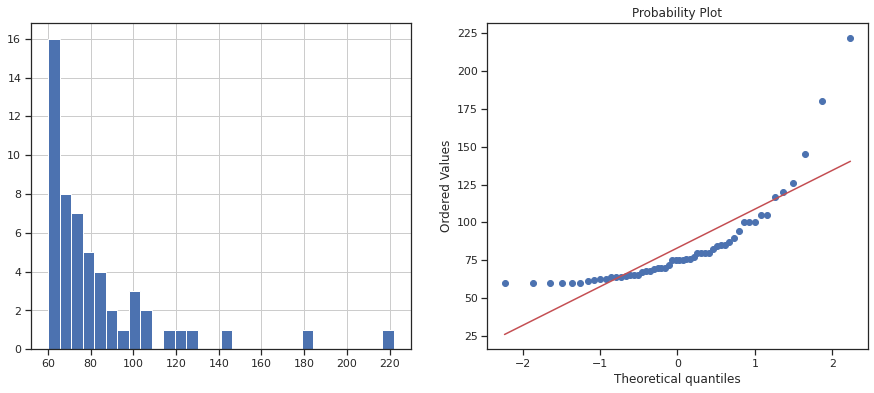

In [ ]:
diagnostic_plots(data, 'Fee(€ mln)')

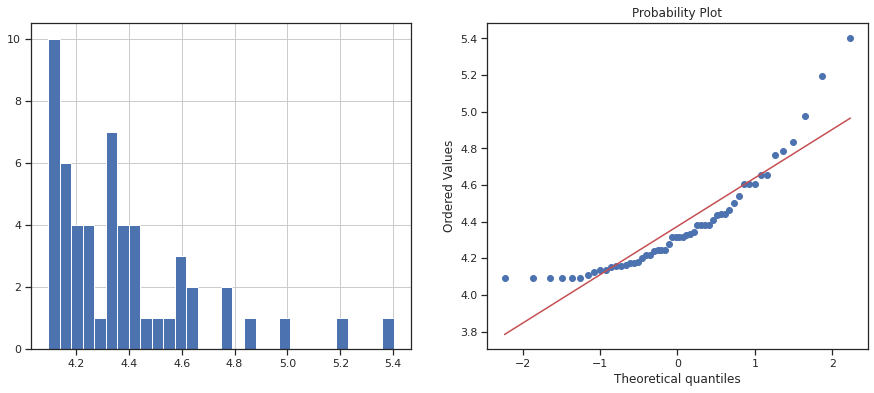

In [ ]:
data['GrLivArea_log'] = np.log(data['Fee(€ mln)'])
diagnostic_plots(data, 'GrLivArea_log')

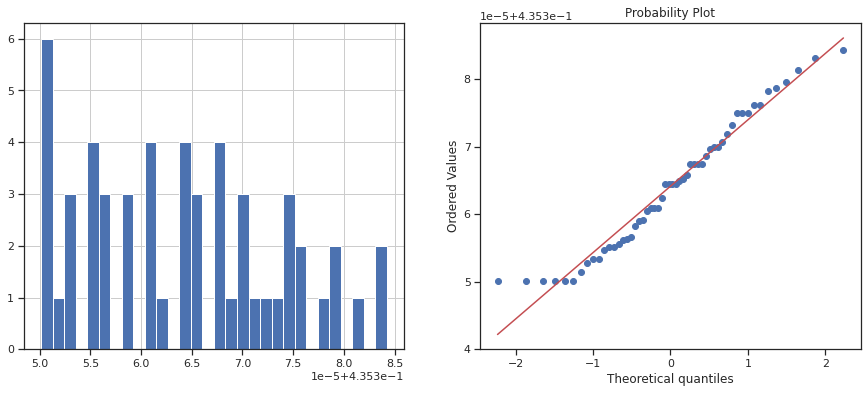

In [ ]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['Fee(€ mln)']) 
diagnostic_plots(data, 'GrLivArea_boxcox')

In [ ]:
import sklearn.impute
import sklearn.preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


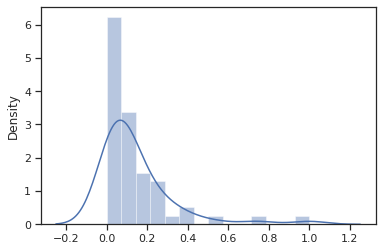

In [ ]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Fee(€ mln)"]]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


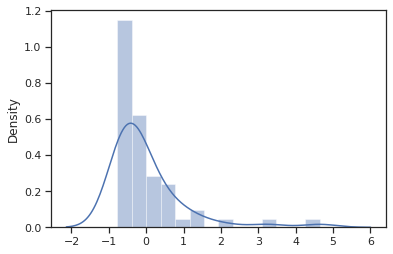

In [ ]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["Fee(€ mln)"]]))